# Exploratory Data Analysis

## 1. **EDA Objective**

### The goal of this EDA is to understand patterns related to loan default risk and identify data quality issues that may affect modeling.


## 2. Dataset Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


%matplotlib inline

In [2]:
df = pd.read_csv("../Loan_default.csv")

In [3]:
df.shape

(255347, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.sample()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
158971,1KPOOPLB9T,19,28829,208921,636,117,1,9.24,24,0.35,PhD,Unemployed,Divorced,Yes,No,Auto,No,0


- Dataset contains ~255k records → large enough for robust modeling

- 18 columns is moderate feature space

Mix of:

- Numerical features (financial, loan-related)

- Categorical features (demographic, status flags)

- Target variable: Default (binary)

No missing values detected during initial inspection (df.info()).

## 3. Target Variable

In [6]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [7]:
df['Default'].value_counts(normalize=True)*100

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

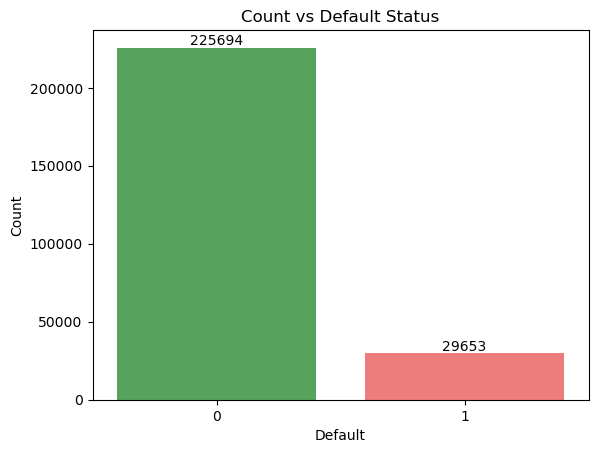

In [8]:
counts = df['Default'].value_counts()

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette=['#4CAF50', '#FF6B6B'],
    legend=False
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Count vs Default Status")
plt.xlabel("Default")
plt.ylabel("Count")


## Class Imbalance Analysis

### Observation
- **Class imbalance exists** in the target variable.
- **Non-defaulters heavily outnumber defaulters**.
- There are **roughly 1 defaulter for every 8 non-defaulters**, indicating a significant skew.

---

### Business Implications
- **Defaulters represent a minority but high-cost class**.
- **False negatives (missed defaulters)** are particularly expensive, as they may lead to financial loss.
- The business objective should prioritize **identifying defaulters accurately**, even at the cost of some false positives.

---

### Modeling Implications
- **Accuracy alone will be misleading** due to class imbalance.
- Evaluation must include metrics such as:
  - **Recall** (especially for the defaulter class)
  - **Precision**
  - **F1-score**
  - **ROC-AUC**
- **Class imbalance handling techniques** (e.g., class weighting, resampling) may be required in later stages of modeling.


## 4. Missing Values Analysis

In [9]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

- There are no missing values in the dataframe

## 5. Feature Groups

### Dataset Feature Overview

#### Identifier
- **LoanID**  
  Unique loan identifier used for record tracking only; **not used for modeling**.


#### Target Variable
- **Default**  
  Binary indicator representing whether a loan default occurred.


#### Numerical Features
- **Age**  
- **Income**  
- **LoanAmount**  
- **CreditScore**  
- **MonthsEmployed**  
- **NumCreditLines**  
- **InterestRate**  
- **LoanTerm**  
- **DTIRatio** (Debt-to-Income Ratio)


#### Categorical Features
- **Education**  
- **EmploymentType**  
- **MaritalStatus**  
- **HasMortgage**  
- **HasDependents**  
- **LoanPurpose**  
- **HasCoSigner**


## 6. Feature Distribution

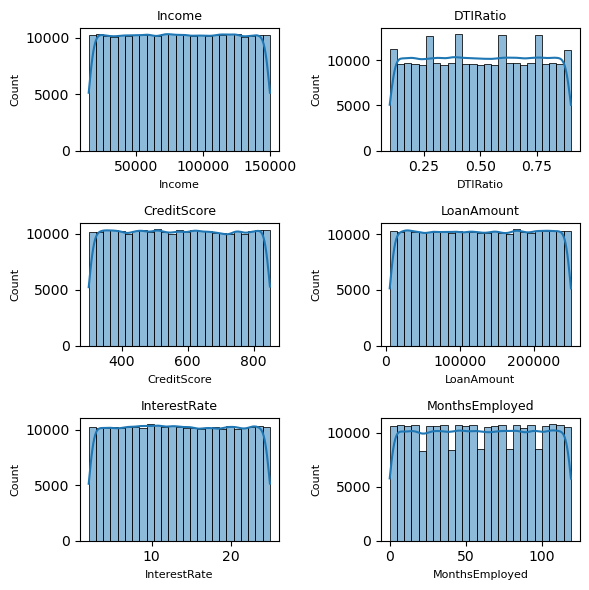

In [10]:
numerical = ['Income','DTIRatio','CreditScore','LoanAmount','InterestRate','MonthsEmployed']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        bins=25,
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("Count", fontsize=8)

plt.tight_layout()
plt.show()


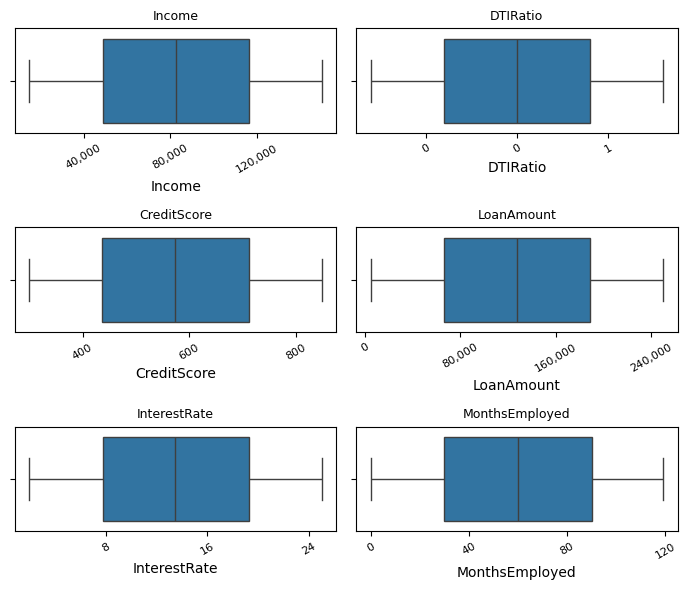

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 6))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelrotation=30, labelsize=8)
    axes[i].xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    axes[i].xaxis.set_major_locator(mtick.MaxNLocator(4))

plt.tight_layout()
plt.show()

### Numerical Feature Insights

#### Income
- Appears evenly spread across a wide range.
- No extreme skewness or strong concentration observed.
- Suggests **income alone may not be a strong discriminator** without interaction with other features.


#### DTIRatio
- Values are spread across both low and high ranges.
- Presence of higher DTI values indicates a **potential risk indicator**.
- Boxplot shows **no extreme outliers**, suggesting stable distribution.


#### CreditScore
- Uniformly distributed across the typical credit score range.
- No heavy clustering at either extreme.
- Indicates credit score may be **more informative when combined** with other variables.


#### LoanAmount
- Displays a wide range with relatively even spread.
- Large variance suggests **feature scaling will be important**, especially for linear models.


#### InterestRate
- Fairly evenly distributed across its range.
- Suggests interest rates may be **policy-driven rather than purely risk-driven** in this dataset.


#### MonthsEmployed
- Wide spread with no sharp spikes or dominant values.
- Indicates employment duration alone may **not be sufficient** to distinguish defaulters.
